Merging Dataframes

Downloading dataframes from csv

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [22]:
csv_dir = 'C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/'
# List to hold dataframes
csv_files = ['NoDrugDataset.csv','Drug5_1000nMrep1Dataset.csv','Drug5_1000nMrep2p1Dataset.csv','Drug8_1000nMrep1Dataset.csv','Drug8_1000nMrep2p1Dataset.csv','Drug_101000nMrep1Dataset.csv','Drug_101000nMrep2Dataset.csv']

In [30]:
# Dictionary to hold DataFrames
dataframes = {}

# Import CSV files into DataFrames
for csv_file in csv_files:
    file_path = os.path.join(csv_dir, csv_file)
    df_name = os.path.splitext(csv_file)[0]  # Use file name without extension as DataFrame name
    dataframes[df_name] = pd.read_csv(file_path)


In [31]:
for df_name, df in dataframes.items():
    print(f"DataFrame '{df_name}' has shape: {df.shape}")

DataFrame 'NoDrugDataset' has shape: (2940, 9)
DataFrame 'Drug5_1000nMrep1Dataset' has shape: (4388, 9)
DataFrame 'Drug5_1000nMrep2p1Dataset' has shape: (482, 9)
DataFrame 'Drug8_1000nMrep1Dataset' has shape: (864, 9)
DataFrame 'Drug8_1000nMrep2p1Dataset' has shape: (1014, 9)
DataFrame 'Drug_101000nMrep1Dataset' has shape: (1155, 9)
DataFrame 'Drug_101000nMrep2Dataset' has shape: (1211, 9)


In [24]:
print(dataframes)

{'NoDrugDataset':      Treatment Replica   FOV  Time  CellCount  CellArea  NucleusArea  \
0       NoDrug    rep1  FOV1     0          1      7473         2754   
1       NoDrug    rep1  FOV1     0          2      8138         2851   
2       NoDrug    rep1  FOV1     0          3      8266         5069   
3       NoDrug    rep1  FOV1     0          4      7905         3203   
4       NoDrug    rep1  FOV1     0          5      7696         3087   
...        ...     ...   ...   ...        ...       ...          ...   
2935    NoDrug    rep2  FOV6    20          6      8049         6590   
2936    NoDrug    rep2  FOV6    20          7      7615         2960   
2937    NoDrug    rep2  FOV6    20          8      7684         2976   
2938    NoDrug    rep2  FOV6    20          9      8052         2886   
2939    NoDrug    rep2  FOV6    20         10      8325         2919   

      mRNA_nucleus  mRNA_cytosol  
0              0.0           9.0  
1              0.0           0.0  
2           

In [ ]:
print(giant_df.shape)

In [25]:
# Merge DataFrames into one giant DataFrame
giant_df = pd.concat(dataframes, ignore_index=True)
# Print the shape of the merged DataFrame
print(giant_df.shape)

(12054, 9)


In [3]:
# # Iterate over all files in the directory
# for file in os.listdir(csv_dir):
#     if file.endswith('.csv'):
#         file_path = os.path.join(csv_dir, file)
#         df = pd.read_csv(file_path)
#         dataframes.append(df)
# print(dataframes)

[         Treatment Replica   FOV  Time  CellCount  CellArea  NucleusArea  \
0           NoDrug    rep1  FOV1     0          1      7473         2754   
1           NoDrug    rep1  FOV1     0          2      8138         2851   
2           NoDrug    rep1  FOV1     0          3      8266         5069   
3           NoDrug    rep1  FOV1     0          4      7905         3203   
4           NoDrug    rep1  FOV1     0          5      7696         3087   
...            ...     ...   ...   ...        ...       ...          ...   
4383  Drug5_1000nM    rep1  FOV6     9          3      8006         3097   
4384  Drug5_1000nM    rep1  FOV6     9          4      8476         6259   
4385  Drug5_1000nM    rep1  FOV6    10          1      7470         6984   
4386  Drug5_1000nM    rep1  FOV6    13          1      7507         5815   
4387  Drug5_1000nM    rep1  FOV6    13          2      7788         2988   

      mRNA_nucleus  mRNA_cytosol  
0              0.0           9.0  
1              0

In [41]:
# Group by 'Treatment' and 'Time', and calculate the mean of 'mRNA_nucleus'
grouped_df_nuc = giant_df.groupby(['Treatment', 'Time']).agg({'mRNA_nucleus': 'mean'}).reset_index()

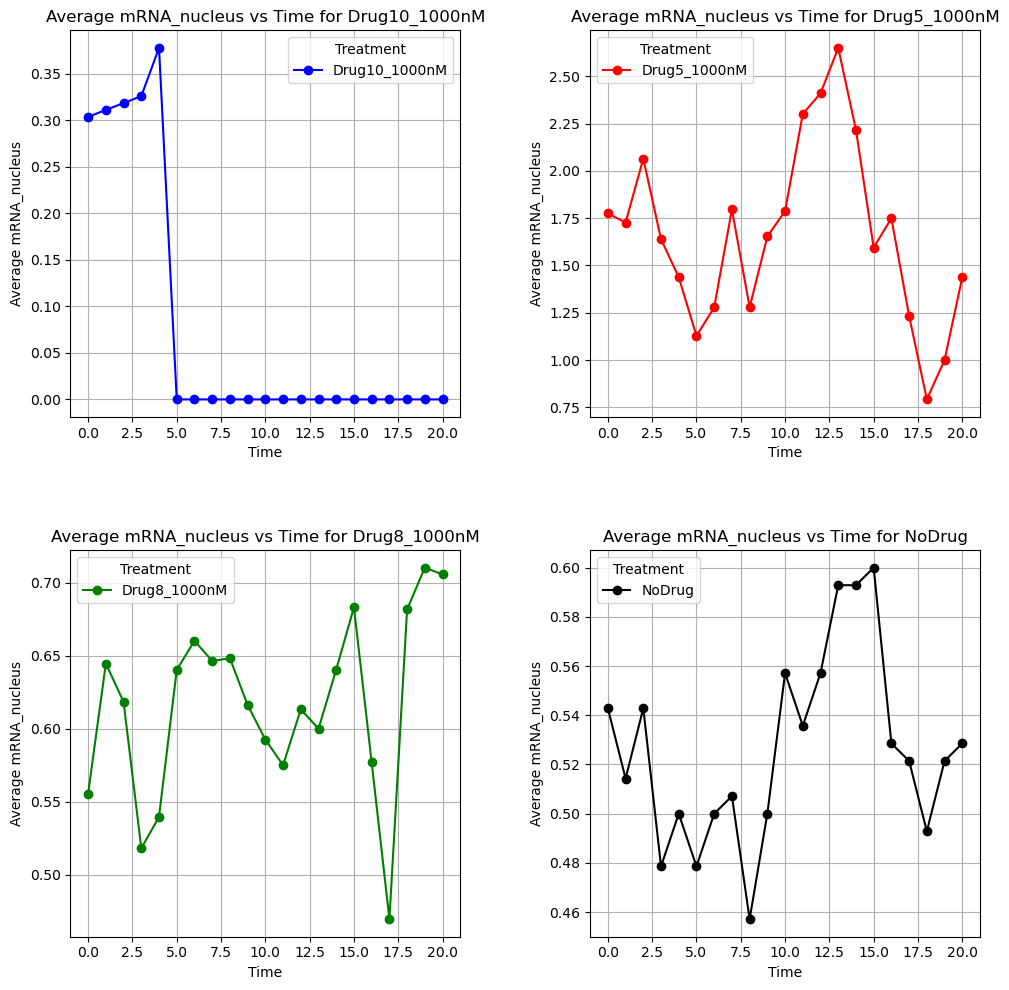

In [51]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

colors = ['blue','red','green','black']
# Get the unique treatments
treatments = grouped_df_nuc['Treatment'].unique()

# Iterate through each subplot and treatment
for i, ax in enumerate(axs.flat):
    if i < len(treatments):  # Ensure we don't try to plot more treatments than subplots available
        treatment = treatments[i]
        treatment_data = grouped_df_nuc[grouped_df_nuc['Treatment'] == treatment]
        
        # Plot the data on the current subplot
        ax.plot(treatment_data['Time'], treatment_data['mRNA_nucleus'], marker='o', label=treatment, color = colors[i])
        
        # Add labels and title to the current subplot
        ax.set_xlabel('Time')
        ax.set_ylabel('Average mRNA_nucleus')
        ax.set_title(f'Average mRNA_nucleus vs Time for {treatment}')
        ax.legend(title='Treatment')
        ax.grid(True)

# Adjust layout
plt.tight_layout(w_pad =5,h_pad=5)

# Show plot
plt.show()

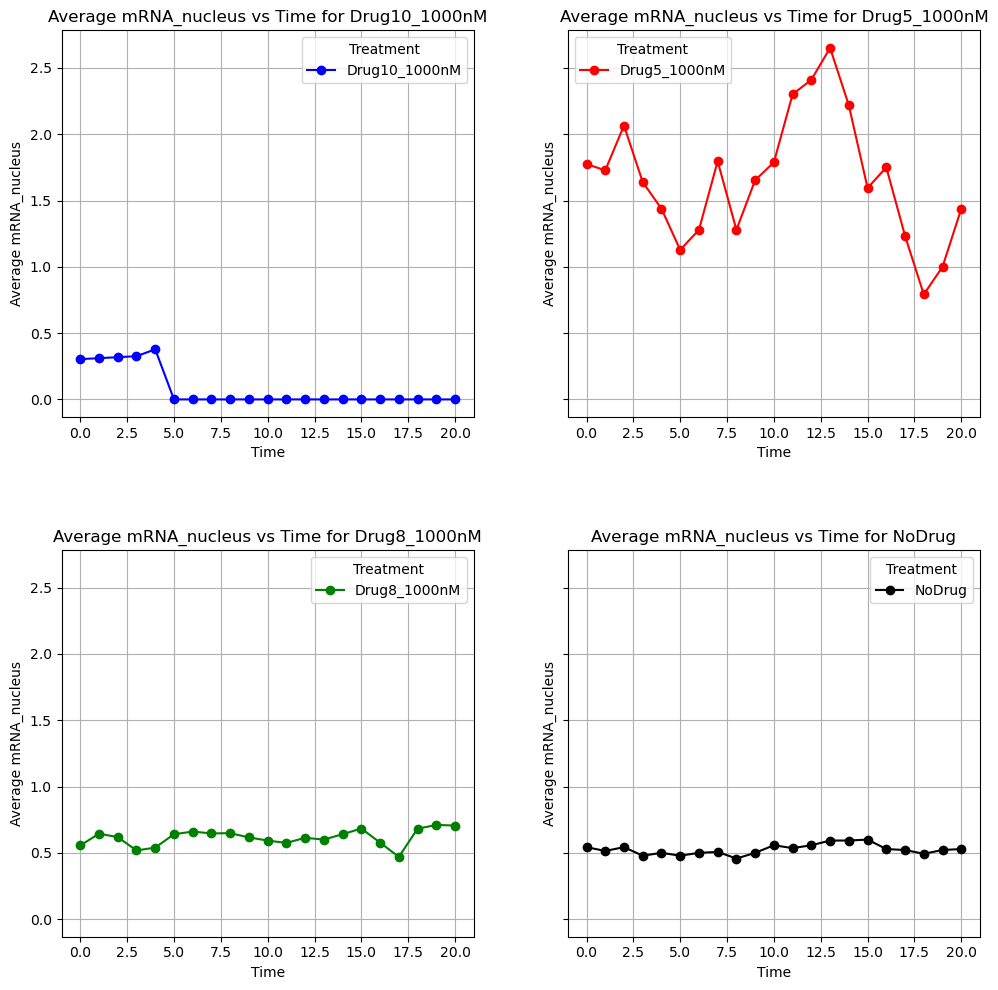

In [52]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

colors = ['blue','red','green','black']
# Get the unique treatments
treatments = grouped_df_nuc['Treatment'].unique()

# Iterate through each subplot and treatment
for i, ax in enumerate(axs.flat):
    if i < len(treatments):  # Ensure we don't try to plot more treatments than subplots available
        treatment = treatments[i]
        treatment_data = grouped_df_nuc[grouped_df_nuc['Treatment'] == treatment]
        
        # Plot the data on the current subplot
        ax.plot(treatment_data['Time'], treatment_data['mRNA_nucleus'], marker='o', label=treatment, color = colors[i])
        
        # Add labels and title to the current subplot
        ax.set_xlabel('Time')
        ax.set_ylabel('Average mRNA_nucleus')
        ax.set_title(f'Average mRNA_nucleus vs Time for {treatment}')
        ax.legend(title='Treatment')
        ax.grid(True)

# Adjust layout
plt.tight_layout(w_pad =5,h_pad=5)

# Show plot
plt.show()

In [38]:
# Group by 'Treatment' and 'Time', and calculate the mean of 'mRNA_nucleus'
grouped_df_cyto = giant_df.groupby(['Treatment', 'Time']).agg({'mRNA_cytosol': 'mean'}).reset_index()

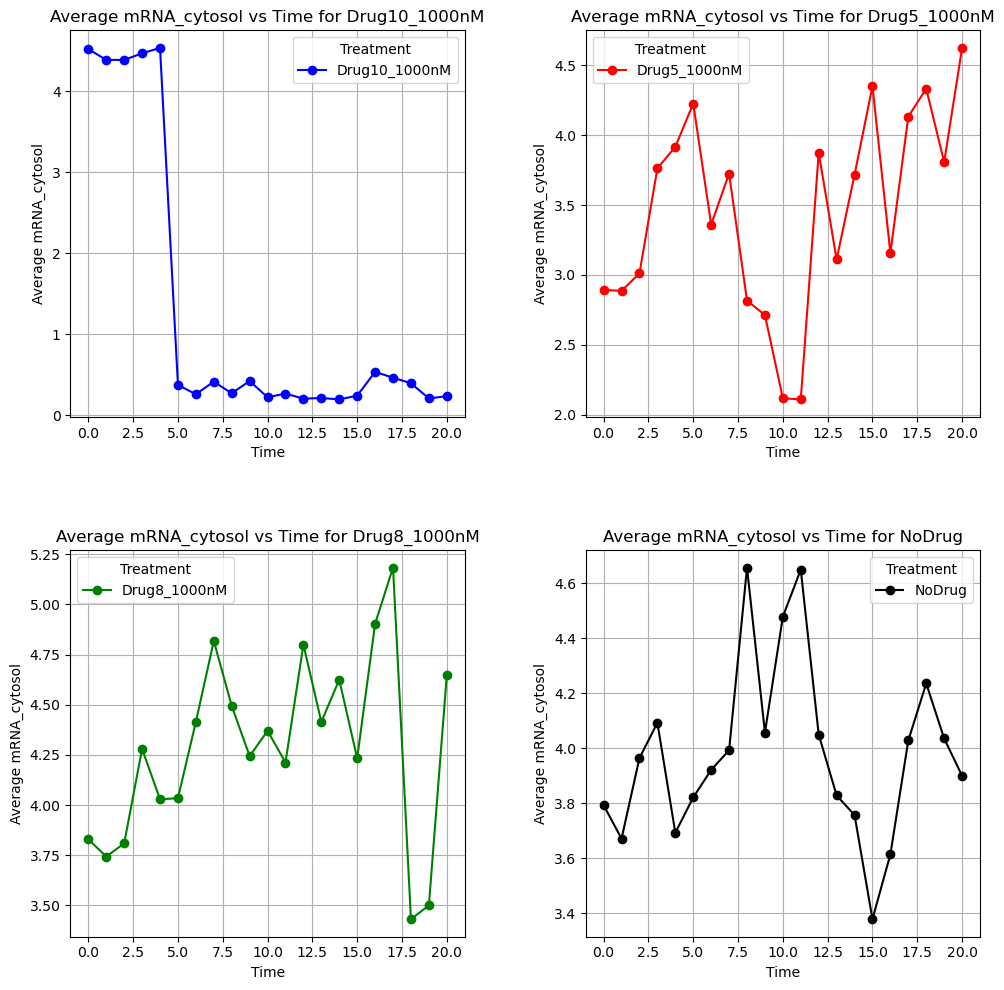

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

colors = ['blue','red','green','black']
# Get the unique treatments
treatments = grouped_df_cyto['Treatment'].unique()

# Iterate through each subplot and treatment
for i, ax in enumerate(axs.flat):
    if i < len(treatments):  # Ensure we don't try to plot more treatments than subplots available
        treatment = treatments[i]
        treatment_data = grouped_df_cyto[grouped_df_cyto['Treatment'] == treatment]
        
        # Plot the data on the current subplot
        ax.plot(treatment_data['Time'], treatment_data['mRNA_cytosol'], marker='o', label=treatment, color = colors[i])
        
        # Add labels and title to the current subplot
        ax.set_xlabel('Time')
        ax.set_ylabel('Average mRNA_cytosol')
        ax.set_title(f'Average mRNA_cytosol vs Time for {treatment}')
        ax.legend(title='Treatment')
        ax.grid(True)

# Adjust layout
plt.tight_layout(w_pad =5,h_pad=5)

# Show plot
plt.show()

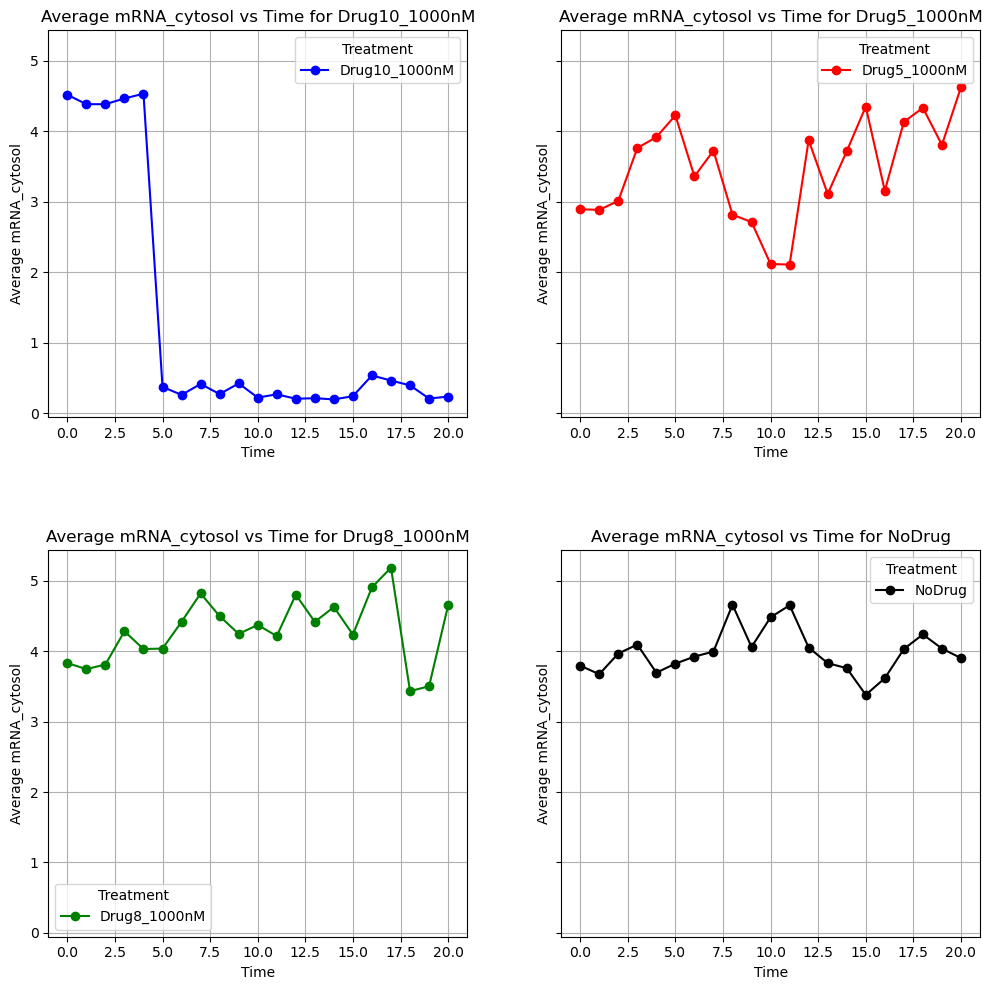

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

colors = ['blue','red','green','black']
# Get the unique treatments
treatments = grouped_df_cyto['Treatment'].unique()

# Iterate through each subplot and treatment
for i, ax in enumerate(axs.flat):
    if i < len(treatments):  # Ensure we don't try to plot more treatments than subplots available
        treatment = treatments[i]
        treatment_data = grouped_df_cyto[grouped_df_cyto['Treatment'] == treatment]
        
        # Plot the data on the current subplot
        ax.plot(treatment_data['Time'], treatment_data['mRNA_cytosol'], marker='o', label=treatment, color = colors[i])
        
        # Add labels and title to the current subplot
        ax.set_xlabel('Time')
        ax.set_ylabel('Average mRNA_cytosol')
        ax.set_title(f'Average mRNA_cytosol vs Time for {treatment}')
        ax.legend(title='Treatment')
        ax.grid(True)

# Adjust layout
plt.tight_layout(w_pad =5,h_pad=5)

# Show plot
plt.show()